# Internacionalização e validação de entrada de dados

Quando construimos uma aplicação, temos que ter em mente seu alncance, regional, nacional ou internacional. Por conta deste possível alcance devemos pensar em tornar nosso aplicativo internacional. 

Para isso nosso App deve verificar qual o idioma principal do aparelho e replicar este idioma para os Apps.

## Onde definimos o idioma do aparelho?

Em configurações> system> idiomas

## Passando o idioma para o app

Dentro do projeto, na pasta "res">"values">"string.xml", adicionaremos as frases do nosso app, para evitar colocar as frases direto na estrutura, por tanto tendo o arquivo string.xml, cadastramos todos os strings neste arquivo

Quando pedirem uma tradução, basta traduzirmos apenas este campo de strings, ao invés de editar em todos os campos.

O correto é que cada idioma tenha um arquivo, por exemplo, um arquivo string.xml para portugues, outro string.xml para ingles...

Por exemplo:


In [ ]:
<resources>
    <string name="app_name">CalculoDeJuros</string>
    <string name="title">Cálculo de Juros Simlpes</string>
    <string name="subtitle">Dados do Investimento</string>
    <string name="valueInv">Valor do investimento</string>
    <string name="valueJuros">Taxa de juros mensal</string>
    <string name="valueMeses">Periodo em meses</string>
    <string name="Calc">Calcular</string>
    <string name="Result">Resultado</string>
    <string name="ResultJuros">Juros</string>
    <string name="ResultMontate">Montate</string>
</resources>

E no app, alteramos também os campos de string.

Por exemplo :

In [ ]:
Text(

    // text = "Cálculo de Juros Simples",                             //COMO ERA
    text = stringResource(id = R.string.title),                       //COMO FICOU, Chamando stringResource(id=R(R do nosso projeto),string.x)
    modifier = Modifier.fillMaxWidth(),
    fontSize = 20.sp,
    color = Color.Red,
    fontWeight = FontWeight.Bold,
    textAlign = TextAlign.Center
)

Faremos isso para todos os campos do APP!

# Tradução da aplicação

o string.xml é o arquivo padrão do idioma do nosso app, para cria um padrão de outro idioma, precisamos:

- Na pasta "res", criar um "Android Resourcer File", o nome do arquivo obrigatóriamente precisa se chamar "strings"

- Especificar a localização > Languague e Região especifica.

<center>

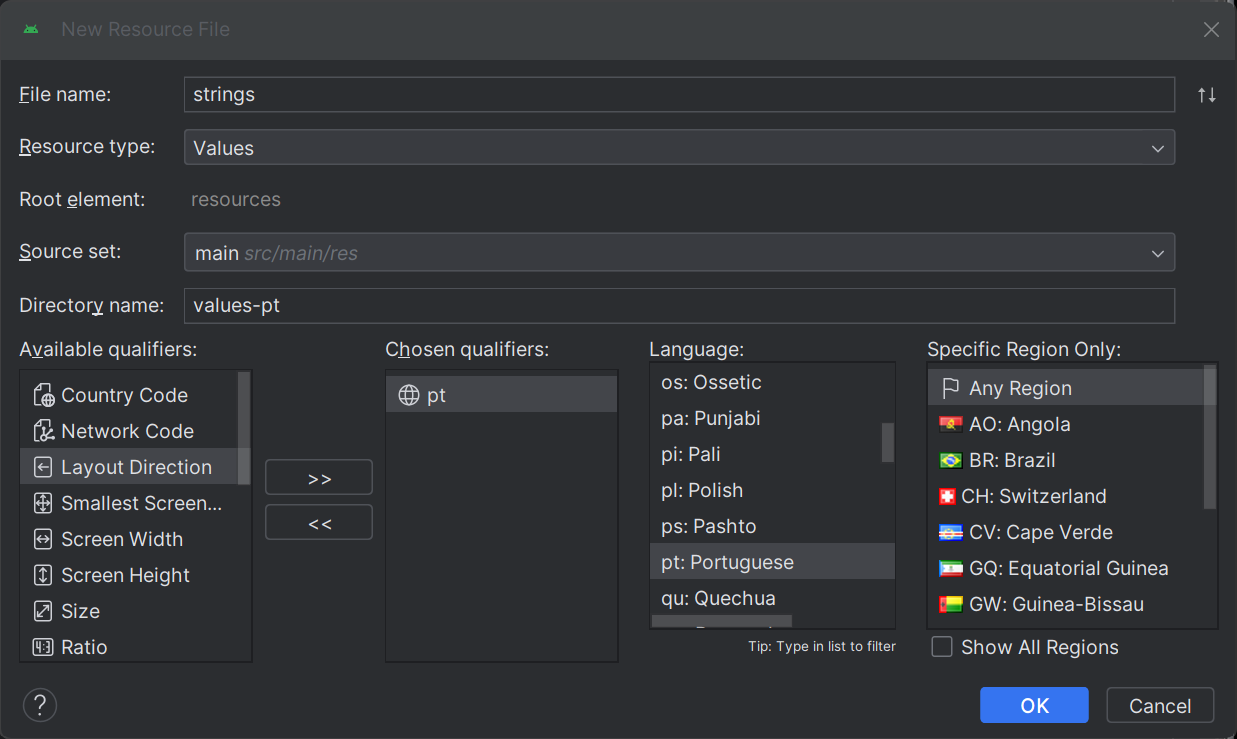

</center>

- Apois isso basta copiar o conteúdo do outro "string.xml" e alterar para o portugues:


In [ ]:
<?xml version="1.0" encoding="utf-8"?>
<resources>
    <string name="app_name">CalculoDeJuros</string>
    <string name="title">Cálculo de Juros Simlpes!</string>
    <string name="subtitle">Dados do Investimento</string>
    <string name="valueInv">Valor do investimento</string>
    <string name="valueJuros">Taxa de juros mensal</string>
    <string name="valueMeses">Periodo em meses</string>
    <string name="Calc">Calcular</string>
    <string name="Result">Resultado</string>
    <string name="ResultJuros">Juros</string>
    <string name="ResultMontate">Montate</string>
    <string name="HolderInv">Quanto deseja investir?</string>
    <string name="HolderJuros">Qual a taxa de juros mensal?</string>
    <string name="HolderMeses">Qual o tempo em meses?</string>

</resources>

Apos isso, caso o usuario tenha o sistema em portugues ou em inglês, basta ele setar nas configurações do aparelho e nosso ap se adapta as linguagens ptBr e US !

E caso o sistema do device esteja configurado com uma linguagem que não temos cadastrada, o sistema considera o arquivo Default (que está em inglês)

## Validação da entrada do usuário

É comum que no campo de número o usuário inserir um texto, por tanto uma tarefa importante validar as entradas do usuário.

Podemos usar varias formas de validação, por exemplo:
- Entregar teclado adequado, se for número, teclado numérico
- Validar, ao clicar fazemos uma validação, caso não atenda, notificamos e damos dica do que deve digitar

### Técnicas de validação

Podemos fazer um validação simples usando por exemplo:

- Tamanho maximo de caracteres na senha

Para isso teremos que definir o comprimento maxímo e usar uma condição <b>IF</b> para validar se o campo "it" é maior que o comprimento..

Exemplo:

In [ ]:
// Variavel password 
var password by remember {
    mutableStateOf("")

}

// Variavel que passa o tamanho maximo 
val tamanhoMaximo = 8


OutlinedTextField(
    value = password,

    // Aqui é onde passaremos a condição ao mudar o valor 
    onValueChange = {
        if(it.length <= tamanhoMaximo) password = it    //Aqui é onde fazemos a validação com IF, se o comprimento de it, for menor ou igual ao tamMax, passar caracter
    },
    modifier = Modifier.fillMaxWidth(),
    label = {
        Text(text = "Enter your password")
    },
    keyboardOptions = KeyboardOptions(keyboardType = KeyboardType.Password),
    visualTransformation = PasswordVisualTransformation()
)

## Informar o erro ao usuário

- O OutlinedText, possui um atributo "ISERROR", que nos avisa em caso de erro, e ele inicia em falso, caso não atende uma condição podemos mudar para "false".

- Pois quando este "ISERROR" for igual a "TRUE" ele ira modificar a cor da caixa de entrada de texto, informando assim um ERRO!

- Podemos támbem testar se o campo esta vazio, e caso esteja vazio este "ISERROR" mude para "TRUE", para isso podemos criar uma variavel que recebe o boolean e passar para o ISERROR esta variavel, e caso as condições sejam atendidas, alterar este boolean.

- Podemos também em caso de TRUE deste ERROR, apareça um texto informativo, simplesmente usando um if e em caso de aceito a condição inserir um TEXT

Exemplo:

In [ ]:
// Criando variavel que recebe o boolean 
var errorEmail by remember {
    mutableStateOf(false)
}


OutlinedTextField(
    value = email,
    onValueChange = { email = it },
    modifier = Modifier.fillMaxWidth(),
    label = {
        Text(text = "Enter your email")
    },
    keyboardOptions = KeyboardOptions(keyboardType = KeyboardType.Email),
    isError = errorEmail

)

// Aqui criamos uma condição para casso o errorMail este true, apareceça um texto 
if (errorEmail){
    Text(
        text = "email is mandatory",
        fontSize = 14.sp,
        color = Color.Red,
        modifier = Modifier.fillMaxWidth(),
        textAlign = TextAlign.End
    )
}


Button(onClick = {
    // Aqui criamos outra condição, se o email estive vazio, de errorEmail, caso contrario errorMail seja igual a false 
    if (email.isEmpty()) errorEmail = true else errorEmail = false
}
) {
    Text(text = "ENTER", modifier = Modifier
        .padding(9.dp)
        .fillMaxWidth(), textAlign = TextAlign.Center)

}